In [44]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [31]:
#Machine Learning imports 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()
print("-----------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare     

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [6]:
test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [7]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
count = train.Embarked.value_counts()
print(count)
print(count.sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
889


In [9]:
train['Embarked'] = train.Embarked.fillna('S')

In [10]:
train.info()
print("-----------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
data = train.copy()
data1 = train.copy()

In [13]:
#def convertTF(df,featureList):
#    d = {'male':1, 'female':0}
#    for feature in featureList:
#        df[feature] = df[feature].apply(lambda x: d[x])
#    return df

#train = convertTF(train, ['Sex'])
#test = convertTF(test, ['Sex'])

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
class_count = train.Pclass.value_counts()
class_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
data[['Survived','Pclass']].groupby('Pclass', as_index = False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [17]:
data[['Survived','Pclass']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1]:
fig= sns.factorplot('Pclass', 'Survived', order =[1,2,3], hue = 'Sex', data = data1, size = 7, kind = 'bar', legend_out=False, ci=None)
fig.despine(left=True)
fig.set_ylabels("survival probability")

NameError: name 'sns' is not defined

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


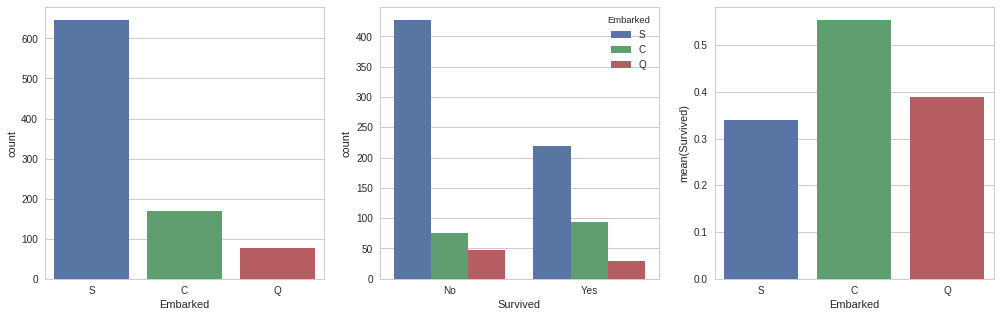

In [20]:
figure, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,5))
sns.countplot(x='Embarked', data = train, ax = ax1)
sns.countplot(x='Survived', hue='Embarked', data = train, ax=ax2)
ax2.set_xticklabels(['No','Yes'])
embark_prob = train[['Survived','Embarked']].groupby('Embarked', as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_prob, order=['S','C','Q'], ax=ax3)
embark_prob.head()

In [21]:
embark_dummies = pd.get_dummies(train['Embarked'])
train = train.join(embark_dummies)

embark_dummies_test = pd.get_dummies(test['Embarked'])
test = test.join(embark_dummies_test)

train.drop(['Embarked'], axis = 1, inplace=True)
test.drop(['Embarked'], axis= 1, inplace= True)
train['C'] = train['C'].astype(int)
train['Q'] = train['Q'].astype(int)
train['S'] = train['S'].astype(int)
test['C'] = test['C'].astype(int)
test['Q'] = test['Q'].astype(int)
test['S'] = test['S'].astype(int)

In [22]:
train.info()
print("-----------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
C           891 non-null int64
Q           891 non-null int64
S           891 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
C              418 non-null int64
Q              418 non-null int64
S              418 non-null int64
dtypes: float64(2), int64(7), object(1)
mem

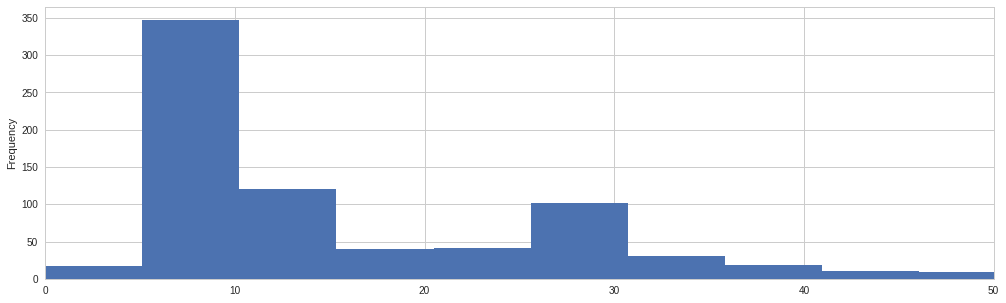

In [23]:
train['Fare'].fillna(train.Fare.median(), inplace=True)
test['Fare'].fillna(test.Fare.median(), inplace=True)

train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

survived_fare = train['Fare'][train['Survived'] == 1]
not_survived_fare = train['Fare'][train['Survived'] == 0]

train['Fare'].plot(kind= 'hist', figsize= (17,5), bins= 100, xlim= (0,50))

/home/raunaq/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/raunaq/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


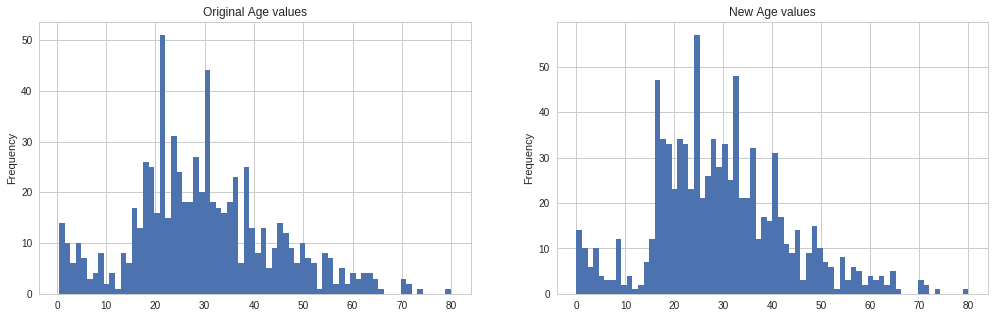

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize= (17,4))
train['Age'].plot(kind='hist', bins= 70, ax= ax1)
ax1.set_title('Original Age values')
ax2.set_title('New Age values')

#Feature: Age
avg_age_train = train['Age'].mean()
std_age_train = train['Age'].std()
avg_age_test = test['Age'].mean()
std_age_test = test['Age'].std()

#Count the number of null values in column Age
count_nan_train = train['Age'].isnull().sum()
count_nan_test = test['Age'].isnull().sum()

#Create random values
rand_train = np.random.randint(avg_age_train - std_age_train, avg_age_train + std_age_train, size = count_nan_train)
rand_test = np.random.randint(avg_age_test - std_age_test, avg_age_test + std_age_test, size = count_nan_test)

#Replace null values with random values generated above
train['Age'][np.isnan(train['Age'])] = rand_train
test['Age'][np.isnan(test['Age'])]= rand_test

train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

train['Age'].plot(kind='hist', figsize=(17,5), bins= 70,ax=ax2)

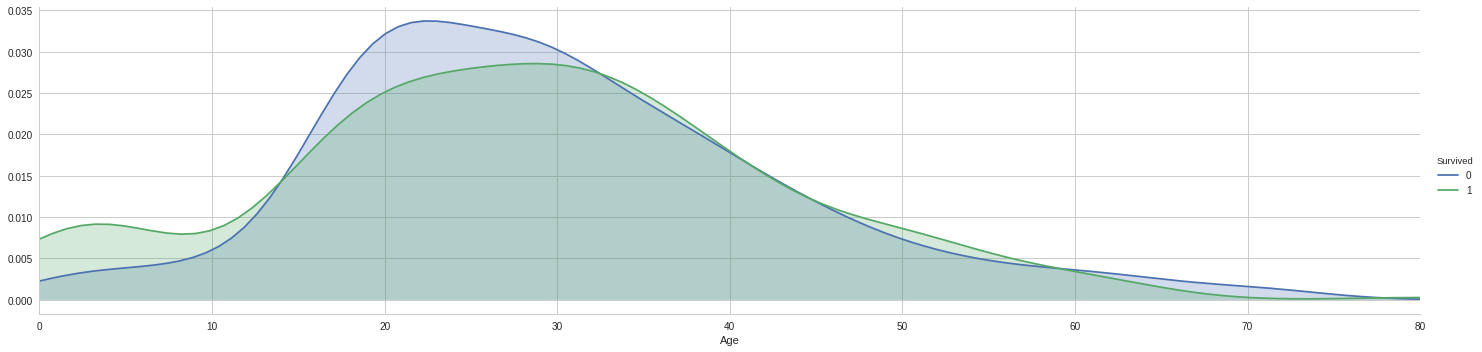

In [25]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4,size=5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

/home/raunaq/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


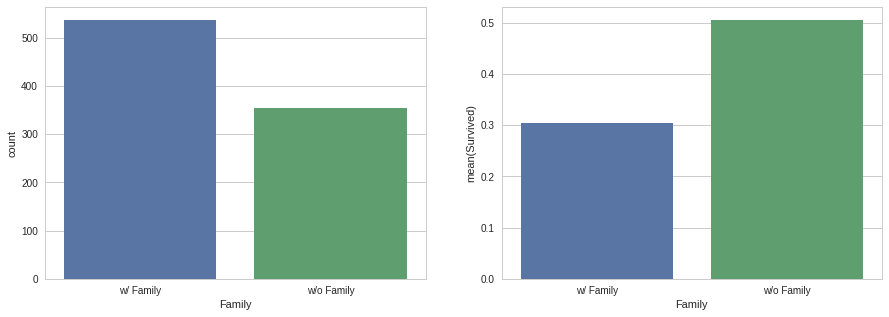

In [26]:
#Family i.e Parch + Siblings
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0
test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

train.drop(["Parch", "SibSp"], axis = 1, inplace = True)
test.drop(["Parch", "SibSp"], axis = 1, inplace = True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
sns.countplot(x = 'Family', data = train, ax = ax1)
ax1.set_xticklabels(['w/ Family','w/o Family'], rotation =0)

family_survival = train[['Family', 'Survived']].groupby(['Family'], as_index = 0).mean()
sns.barplot(x = 'Family', y = 'Survived', data = family_survival, ax = ax2)
ax2.set_xticklabels(['w/ Family','w/o Family'], rotation =0)

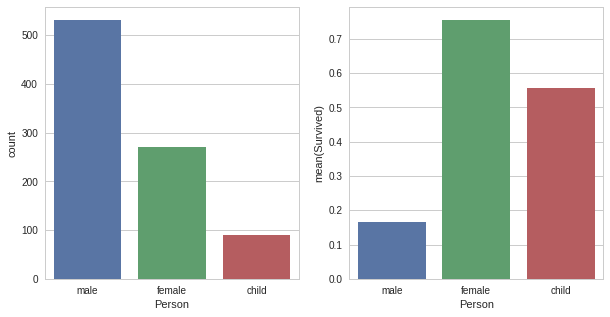

In [27]:
# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
train['Person'] = train[['Age','Sex']].apply(get_person,axis=1)
test['Person']    = test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(train['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train   = train.join(person_dummies_titanic)
test    = test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train.drop(['Person'],axis=1,inplace=True)
test.drop(['Person'],axis=1,inplace=True)

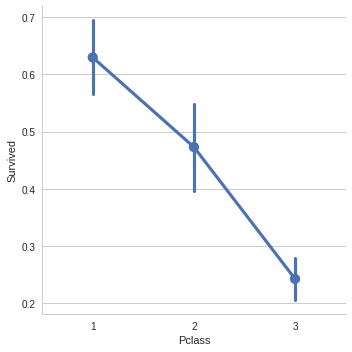

In [28]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(train['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

train = train.join(pclass_dummies_titanic)
test    = test.join(pclass_dummies_test)

In [29]:
#MACHINE LEARING & TESTING

X = train.drop(['Survived'], axis = 1)
Y = train['Survived']
X_test = test.drop(['PassengerId'], axis = 1).copy()

In [32]:
logr = LogisticRegression()
logr.fit(X, Y)
Y_test = logr.predict(X_test)
logr.score(X, Y)

0.80695847362514028

In [33]:
clf = MLPClassifier(solver = 'lbfgs', alpha = 0.005, hidden_layer_sizes=(10,10,10), random_state= 1)

In [34]:
clf.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [37]:
Y_test_mlp = clf.predict(X_test)
clf.score(X,Y)


0.81144781144781142

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)

In [40]:
random_forest.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [42]:
Y_pred = random_forest.predict(X_test)
random_forest.score(X, Y)

0.96520763187429859

In [47]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logr.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,-0.022731
1,Fare,0.000994
2,C,-0.065302
3,Q,-0.306663
4,S,-0.711115
5,Family,-0.161185
6,Child,1.650979
7,Female,2.700221
8,Class_1,1.951159
9,Class_2,1.146045


In [52]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(random_forest.feature_importances_)

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,0.315203
1,Fare,0.247511
2,C,0.015053
3,Q,0.009115
4,S,0.014955
5,Family,0.028678
6,Child,0.025410
7,Female,0.242524
8,Class_1,0.053713
9,Class_2,0.047839


In [53]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)